In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix, lambdify, sin, cos
from sympy.abc import t
from sympy.solvers.solveset import linsolve
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
from scipy.integrate import solve_ivp

init_vprinting()

In [9]:
q1, q2 = dynamicsymbols('q_1 q_2')
params = [q1, q1.diff(), q2, q2.diff()]
initial_conditions = [np.pi/18, 0, np.pi/6, 0]
time_interval = [0, 15]
# l1, l2, m1, m2, g = 1, 1, 1, 1, 9.81
l, m, g = 1, 1, 9.81
q1f, q2f = np.pi/6, np.pi/3
b01, g01, b12, g12 = 450, 300, 200, 300
IC1, IC2 = m*l**2/12, m*l**2/12
IA, IB = IC1 + m*(l/2)**2, IC2 + m*(l/2)**2

q1_t = initial_conditions[0] + (q1f-q10)/15*(t - 15/(2*np.pi)*np.sin(2*np.pi*t/15))
q2_t = initial_conditions[2] + (q2f-q20)/15*(t - 15/(2*np.pi)*np.sin(2*np.pi*t/15))

T01 = Matrix([0,0,-b01*q1.diff() - g01*(q1-q1f) + 0.5*g*l*m*cos(q1) + g*l*m*cos(q1)])
T12 = Matrix([0,0,-b12*q2.diff() - g12*(q2-q2f) + 0.5*g*l*m*cos(q2)])

omg1, omg2 = Matrix([0,0,q1.diff()]), Matrix([0,0,q2.diff()])
alp1, alp2 = omg1.diff(), omg2.diff()
G1, G2 = Matrix([0,-m*g,0]), Matrix([0,-m*g,0])

rC1 = l/2 * Matrix([cos(q1), sin(q1), 0])
rC2 = 2*rC1 + l/2 * Matrix([cos(q2), sin(q2), 0])
vC1, vC2 = rC1.diff(), rC2.diff()
aC1, aC2 = vC1.diff(), vC2.diff()

# moment of inertia locates at rotational axis (point A)
T1 = IA * omg1.dot(omg1) / 2
# moment of inertia locates at the center of mass of link 2
T2 = IC2 * omg2.dot(omg2) / 2 + m * vC2.dot(vC2) / 2
T = T1 + T2

# external forces/moments acting on the system are G1, G2, T12, T01
Q1 = G1.dot(rC1.diff(q1)) + T01.dot(omg1.diff(q1.diff())) - T12.dot(omg1.diff(q1.diff()))\
       + G2.dot(rC2.diff(q1)) + T12.dot(omg2.diff(q1.diff()))
Q2 = G1.dot(rC1.diff(q2)) + T01.dot(omg1.diff(q2.diff())) - T12.dot(omg1.diff(q2.diff()))\
       + G2.dot(rC2.diff(q2)) + T12.dot(omg2.diff(q2.diff()))

eq1 = (T.diff(q1.diff())).diff(t) - T.diff(q1) - Q1
eq2 = (T.diff(q2.diff())).diff(t) - T.diff(q2) - Q2

In [10]:
sol = list(linsolve((eq1, eq2), (alp1[2], alp2[2])))[0]

In [11]:
dq1 = lambdify(params, q1.diff())
ddq1 = lambdify(params, sol[0])
dq2 = lambdify(params, q2.diff())
ddq2 = lambdify(params, sol[1])
fun = lambda time, y: [dq1(*y), ddq1(*y), dq2(*y), ddq2(*y)]
res = solve_ivp(fun, time_interval, initial_conditions,
               t_eval=np.linspace(*time_interval, 10000))

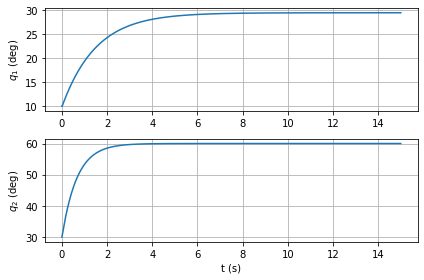

In [35]:
fig, ax = plt.subplots(nrows=2)
ax[0].plot(res.t, res.y[0]*180/np.pi)
ax[1].plot(res.t, res.y[2]*180/np.pi)
ax[0].grid()
ax[1].grid()
ax[0].set_ylabel(r'$q_1$ (deg)')
ax[1].set_ylabel(r'$q_2$ (deg)')
ax[1].set_xlabel(r't (s)')
plt.tight_layout()
plt.savefig('q1_q2_lagrantian.png', dpi=600)

Text(0.5, 0, 't (s)')

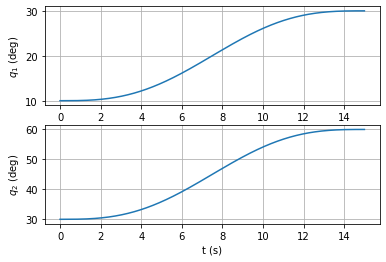

In [33]:
t_num = np.linspace(0,15,10000)


fig, ax = plt.subplots(nrows=2)
ax[0].plot(t, q1*180/np.pi)
ax[1].plot(t, q2*180/np.pi)
ax[0].grid()
ax[1].grid()
ax[0].set_ylabel(r'$q_1$ (deg)')
ax[1].set_ylabel(r'$q_2$ (deg)')
ax[1].set_xlabel(r't (s)')
# plt.tight_layout()
# plt.savefig('q1_q2_lagrantian.png', dpi=600)

In [38]:
T01_num = lambdify(params, T01[2])
T12_num = lambdify(params, T12[2])
T01_num(q1, res.y[1], q2, res.y[3])
T12_num(q1, res.y[1], q2, res.y[3])

array([119.21120121, 170.4183189 , 135.50176579, ...,  12.73919703,
        12.73861258,  12.73883222])